# Jose Tomas Lopez

How has the trend away from mid-range shooting affected the game of basketball in the NBA over the last decade, and is mid-range shooting still a viable and relevant strategy in the present and future? This study will explore the decline in mid-range shooting volume and efficiency by year throughout NBA history, comparing the best mid-range shooters across eras, such as Michael Jordan and DeMar DeRozan. The research will also investigate the impact of this trend on the game of basketball and determine whether mid-range shooting remains an effective strategy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)

In [2]:
import scripts
from scripts import final_function_try as pf

In [3]:
df = pf.player_per_game_processed('../data/raw/Player Per Game.csv')
df2 = pf.load_and_process_per_game('../data/raw/Player Per Game.csv')

Text(0.5, 1.0, 'Two Pointer Field Goals per Game Average')

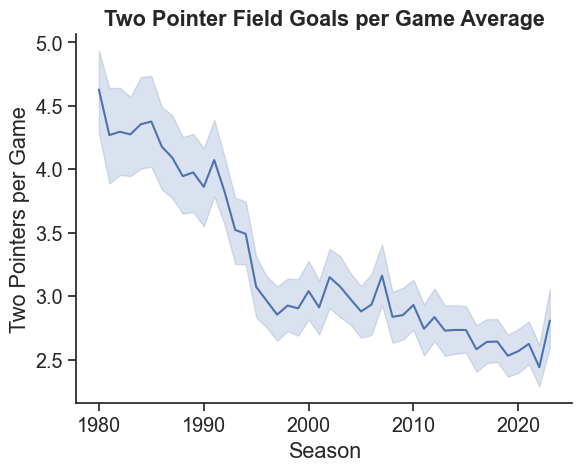

In [8]:
ax = sns.lineplot(data=df, x='season', y='two_pointers_per_game')
ax.set(xlabel='Season', ylabel='Two Pointers per Game')
ax.set_title('Two Pointer Field Goals per Game Average', fontweight='bold')

The Two Point Field Goal, formerly the predominant shot in the NBA, has been surpassed in popularity by the advent of the three point line. According to the graph presented above, the average number of two-point shots attempted per season by all players has shown a consistent decline since 1980. Notably, the 1999-2000 season saw a significant reduction in the frequency of such shots, which can be attributed to a new wave of NBA players who were raised with an emphasis on three-point shooting.

[Text(0.5, 1.0, 'Change in Two Point Shot Percentage per Season'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Two Point Percentage')]

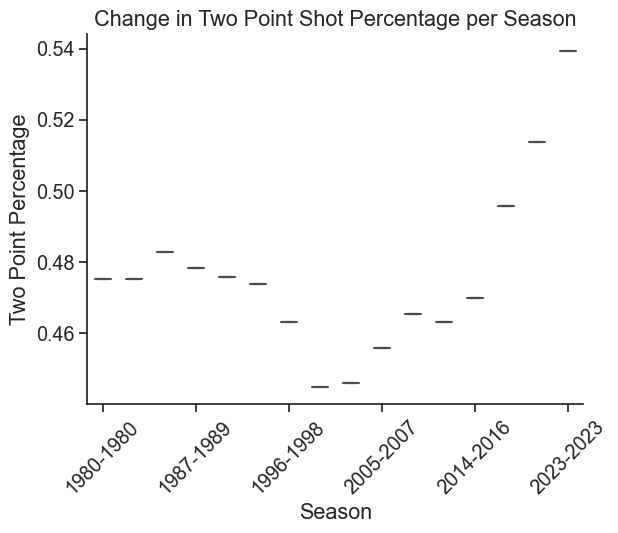

In [5]:
df_grouped = df.groupby((df['season']-1)//3*3)
graph2 = sns.boxplot(x=df_grouped['season'].min().astype(str) + '-' + df_grouped['season'].max().astype(str), 
                     y='two_point_percentage', 
                     data=df_grouped.mean(numeric_only=True), 
                     whis=[0, 100], 
                     width=.5, 
                     palette="vlag")

# Show every third season on x-axis and rotate x-axis labels
plt.xticks(rotation=45)
xticks = plt.gca().xaxis.get_major_ticks()
for i, tick in enumerate(xticks):
    if i % 3 != 0:
        tick.set_visible(False)

# Add title and axis labels
graph2.set(title="Change in Two Point Shot Percentage per Season",
           xlabel="Season", ylabel="Two Point Percentage")

The data presented above includes all seasons since 1980, divided into groups of three seasons for ease of viewing. It shows that after a brief 20-year window, during which the overall success rate on two-point shots decreased due to the invention of the three-point line, a group of individuals emerged who have since enjoyed greater success with two-point shots. This trend has continued over time, resulting in an overall increase in success for two-point shots as players find different avenues of specializing in their craft.

In [ ]:
errorbar=none

/var/folders/p0/vwbfd4hn6vx0wb05w2cgy31w0000gn/T/ipykernel_4901/3740695599.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2) \


Stat,Count,Mean,Std Dev,Min,Q1,Median,Q3,Max
Player,,,,,,,,
DeMar DeRozan,13,517.15,132.27,251,436.00,540.00,567.00,724
Michael Jordan,15,774.07,289.06,147,734.00,851.00,940.50,1086
Stephen Curry,13,289.08,117.80,21,250.00,351.00,362.00,403


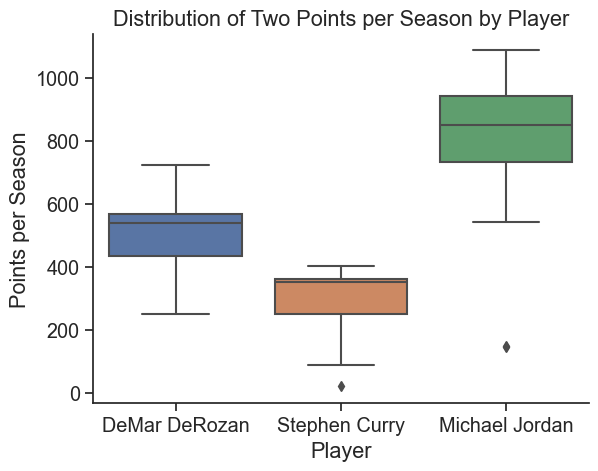

In [6]:
# create boxplot using seaborn
sns.boxplot(data=df2, x='player_name', y='two_pointers')
plt.title('Distribution of Two Points per Season by Player')
plt.ylabel('Points per Season')
plt.xlabel('Player')

# use groupby and describe to create table
stats = df2.groupby('player_name')['two_pointers'] \
    .describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] \
    .rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Std Dev', 
                     'min': 'Min', '25%': 'Q1', '50%': 'Median', '75%': 'Q3', 'max': 'Max'})

# format table for better readability
stats.index.name = 'Player'
stats.columns.name = 'Stat'
stats.style.set_caption('Descriptive Statistics for Two Points per Season by Player') \
    .set_precision(2) \
    .format('{:.2f}', subset=['Mean', 'Std Dev', 'Q1', 'Median', 'Q3']) \
    .format('{:.0f}', subset=['Count', 'Min', 'Max']) \
    .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), 
                                                         ('color', 'black')]}])


The data above compares the performance of NBA legends Michael Jordan, Demar DeRozan, and Stephen Curry, with a focus on their proficiency with two-point and three-point shots. Despite entering the league just three years after the creation of the three-point line, Michael Jordan's specialization in two-point shots led to a higher overall average in this area. In contrast, Demar DeRozan represents the new wave of NBA players who attempt more two-point shots than Curry but still fall short of Jordan's record due to differences in training and specialization. Overall, this data highlights the importance of specialization and training in determining success in different areas of the game.

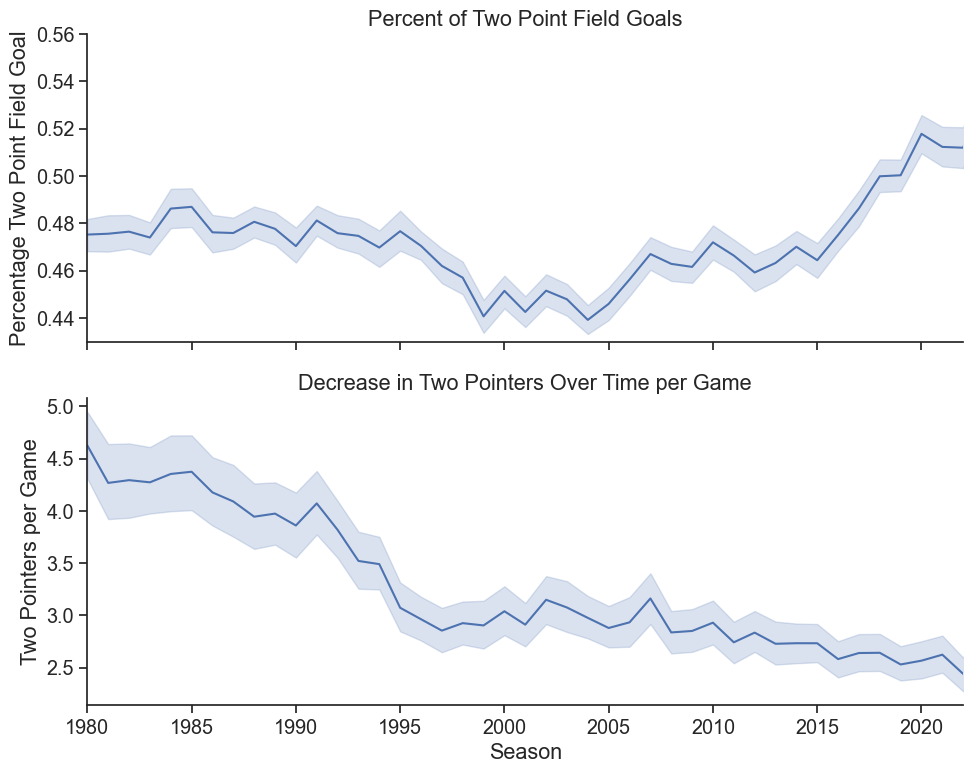

In [7]:

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)

# Plot first lineplot on first subplot
sns.lineplot(data=df, x='season', y='two_point_percentage', ax=ax1)\
   .set(xlabel='', ylabel='Percentage Two Point Field Goal', 
        title='Percent of Two Point Field Goals', ylim=(0.43, 0.56))

# Plot second lineplot on second subplot
sns.lineplot(data=df, x='season', y='two_pointers_per_game', ax=ax2)\
   .set(xlabel='Season', ylabel='Two Pointers per Game', 
        title='Decrease in Two Pointers Over Time per Game', xlim=(1980, 2022))

# Show the plot
plt.tight_layout()
plt.show()

The graphs displayed above provide an insight into the average number of Two Pointer shots attempted in different seasons of the NBA and the differences in the success rate of these shots. As depicted in the diagrams, there has been a consistent decline in the number of Two Pointer shots made by each player since the introduction of the three-point line in 1979-1980. As a result, there has been a reduction in the overall percentage of successful Two Pointer shots, with a notable improvement in the middle of the 2000 and 2005 seasons. These findings suggest that while most players have shifted their focus towards three-point shots, those specializing in Two Pointer shots are honing the necessary skills, leading to more tremendous success and efficiency in their shots.